In [ ]:
%reset

In [1]:
import xarray as xr
import glob
#data = xr.open_dataset('LIS_HIST_nn_200909.nc', engine = 'netcdf4') 
#print(data)
#lon = data.lon.values[0]
path = '/Users/carina/Desktop/data/seup/TUM/nn/'

fileList = glob.glob(path + '*.nc')
fileList.sort()


In [91]:
def process_month(file):
    data = xr.open_dataset(file, engine = 'netcdf4') 
    attrs_ = {'units': 'hours since 1900-01-01'}
    ds_temp = xr.Dataset({'time': ('time', data.time, attrs_)})
    temp = xr.decode_cf(ds_temp)
    ds_reduced = xr.Dataset({'SnowDepth': (['time'], data.SnowDepth_tavg.values[:, 0, 0]),
                                  'SnowT':(['time'], data.SnowT_tavg.values[:, 0, 0, 0]),
                                  'Qs_tavg':(['time'], data.Qs_tavg.values[:, 0, 0]),
                                  'SWE_tavg':(['time'], data.SWE_tavg.values[:, 0, 0])},
                                 coords = {'longitude': (data.lon.values[0, 0, 0]),
                                           'latitude': (data.lat.values[0, 0, 0]),
                                           'time': temp.time.values})
    return ds_reduced

In [3]:
ds_total = None
for file in fileList:
    ds = process_month(file)
    if ds_total:
        ds_total = xr.concat([ds_total, ds], dim = 'time')
    else:
        ds_total = ds

/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.
/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.
/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a for

/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.
/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.
/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a for

/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.
/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.
/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a for

/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.
/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.
/Users/carina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a for

<xarray.Dataset>
Dimensions:           (SnowDensity_profiles: 3, SnowGrain_profiles: 3, SnowIce_profiles: 3, SnowLiq_profiles: 3, SnowT_profiles: 3, SnowThick_profiles: 3, SoilMoist_profiles: 4, SoilTemp_profiles: 4, east_west: 1, north_south: 1, time: 240)
Coordinates:
  * time              (time) int32 961332 961335 961338 961341 961344 961347 ...
Dimensions without coordinates: SnowDensity_profiles, SnowGrain_profiles, SnowIce_profiles, SnowLiq_profiles, SnowT_profiles, SnowThick_profiles, SoilMoist_profiles, SoilTemp_profiles, east_west, north_south
Data variables:
    Albedo_tavg       (time, north_south, east_west) float32 ...
    Evap_tavg         (time, north_south, east_west) float32 ...
    LAI_tavg          (time, north_south, east_west) float32 ...
    Lwnet_tavg        (time, north_south, east_west) float32 ...
    Qh_tavg           (time, north_south, east_west) float32 ...
    Qle_tavg          (time, north_south, east_west) float32 ...
    Qs_tavg           (time, north

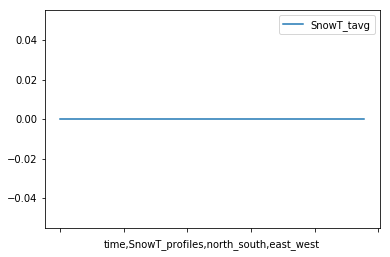

In [89]:
dat = xr.open_dataset('LIS_HIST_nn_200909.nc', engine = 'netcdf4') 
a = dat.SnowT_tavg.to_dataframe()
#a
b = a.groupby("SnowT_tavg")
#a.north_south.plot()
b.plot()
dat

In [55]:
# xarray dataset for Dana
dana = pd.read_csv('hourly_met_DANA_IDSOCLOUd_scaledP_1.1.txt', sep=r'\t', engine='python')
dana.columns = ['date', 'air_t', 'ws', 'RH', 'SW', 'LW', 'Precip'] 
dana['hours'] = dana.index
attrs_dana = {'units': 'hours since 2002-10-01'}
ds_temp_dana = xr.Dataset({'time': ('time', dana.hours, attrs_dana)})

temp_dana = xr.decode_cf(ds_temp_dana)
ds_dana = xr.Dataset({'air_t': (['time'], dana.air_t),
                                  'ws':(['time'], dana.ws),
                                  'RH':(['time'], dana.RH),
                                  'SW':(['time'], dana.SW),
                                  'LW':(['time'], dana.LW),
                              'Precip':(['time'], dana.Precip)},
                                 coords = {'longitude': 37.897,
                                           'latitude': -119.257,
                                           'time': temp_dana.time.values})


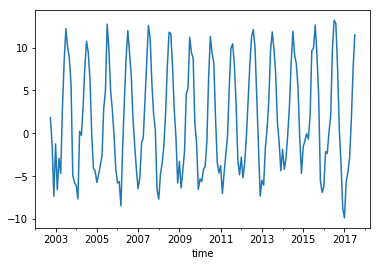

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
monthly_avg_dana = ds_dana.resample(time='1MS').mean()
monthly_avg_seup = ds_total.resample(time='1MS').mean()
a = monthly_avg_dana.air_t.to_dataframe()
#b = monthly_avg_seup
a.air_t.plot()

In [59]:
ds_dana

<xarray.Dataset>
Dimensions:    (time: 130031)
Coordinates:
    longitude  float64 37.9
    latitude   float64 -119.3
  * time       (time) datetime64[ns] 2002-10-01 2002-10-01T01:00:00 ...
Data variables:
    air_t      (time) float64 -5.56 -6.11 -6.67 -7.78 -7.22 -7.78 -6.11 ...
    ws         (time) float64 0.447 0.447 0.447 0.447 0.447 0.447 0.894 ...
    RH         (time) float64 52.0 44.0 41.0 47.0 88.0 94.0 88.0 62.0 50.0 ...
    SW         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 17.69 124.6 236.8 ...
    LW         (time) float64 215.4 212.0 209.4 206.5 215.2 214.0 284.4 ...
    Precip     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...